# TF Regression 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
x_data = np.linspace(.0, 10., 1000000)

In [3]:
print(x_data.shape)
x_data

(1000000,)


array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [4]:
noise = np.random.randn(len(x_data))
noise.shape

(1000000,)

In [5]:
m = .5
b = 5
y_true = m*x_data+b+noise

In [6]:
my_data = pd.concat([pd.DataFrame(x_data, columns=["X data"]), pd.DataFrame(y_true, columns=["Y"])], axis=1)

In [7]:
my_data.head(), my_data.shape

(    X data         Y
 0  0.00000  6.231311
 1  0.00001  3.003848
 2  0.00002  5.454090
 3  0.00003  3.423265
 4  0.00004  5.971244, (1000000, 2))

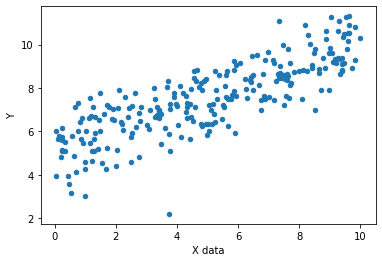

In [8]:
my_data.sample(250).plot(kind="scatter", x="X data", y="Y")

###### We've got data 


In [9]:
# random 10 point to grab
batch_size = 8

*** Variables \***

In [10]:
m = tf.Variable(.5)
b = tf.Variable(1.)

Instructions for updating:
Colocations handled automatically by placer.


*** Placeholders ***

In [11]:
yph = tf.placeholder(tf.float32, [batch_size])
xph = tf.placeholder(tf.float32, [batch_size])

*** Graph ***

In [12]:
y_model = xph*m + b

*** Loss function ***

In [13]:
err = tf.reduce_sum(tf.square(yph-y_model))

*** Optimizer ***

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(err)

*** Initialize variables ***

In [15]:
init = tf.global_variables_initializer()

## Session

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])

In [17]:
model_m

0.5396966

In [18]:
model_b

4.9305043

## Results

In [19]:
y_hat = x_data * model_m + model_b

In [20]:
y_hat

array([ 4.93050432,  4.93050972,  4.93051512, ..., 10.32745927,
       10.32746467, 10.32747006])

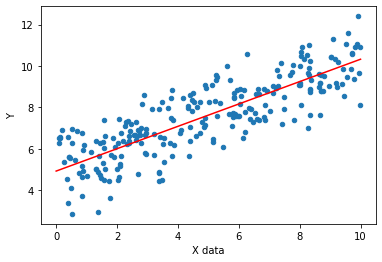

In [21]:
my_data.sample(250).plot(kind="scatter", x="X data", y="Y")
plt.plot(x_data, y_hat, "r")

# tf.estimator API

In [22]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [23]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmptqbt05ob', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f82fc4b8a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### train test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700000,), (300000,), (700000,), (300000,))

### setup estimator inputs 

In [26]:
input_fnc = tf.estimator.inputs.numpy_input_fn({'x':X_train}, y_train, batch_size=4,num_epochs=None, shuffle=True)

In [27]:
train_input_fn = tf.estimator.inputs.numpy_input_fn({'x':X_train}, y_train, batch_size=4,num_epochs=1000, shuffle=False)

In [41]:
test_input_fn = tf.estimator.inputs.numpy_input_fn({'x':X_test}, y_test, batch_size=4,num_epochs=1000, shuffle=False)

### Train estimator API

In [29]:
estimator.train(input_fn=input_fnc, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmptqbt05ob/model.ckpt.
INFO:tensorflow:loss = 140.14131, step = 1
INFO:tensorflow:global_step/sec: 156.068
INFO:tensorflow:loss = 10.390587, step = 101 (0.643 sec)
INFO:tensorflow:global_step/sec: 256.506
INFO:tensorflow:loss = 4.916417, step = 201 (0.390 sec)
INFO:tensorflow:global_step/sec: 244.483
INFO:tensorflow:loss = 3.0932162, step = 301 (0.415 sec)
INFO:tensorflow:global_step/sec: 229.611
INFO:tensorflo

## Evaluation

In [30]:
train_metrics = estimator.evaluate(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-01T12:30:08Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmptqbt05ob/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-09-01-12:30:14
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0695071, global_step = 1000, label/mean = 7.502369, loss = 4.2780285, predicti

In [42]:
test_metrics = estimator.evaluate(input_fn=test_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-01T12:32:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptqbt05ob/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-09-01-12:33:01
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.091321, global_step = 1000, label/mean = 7.480267, loss = 4.365284, prediction/mean = 7.3780475
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [43]:
train_metrics, test_metrics

({'average_loss': 1.0695071,
  'label/mean': 7.502369,
  'loss': 4.2780285,
  'prediction/mean': 7.418079,
  'global_step': 1000},
 {'average_loss': 1.091321,
  'label/mean': 7.480267,
  'loss': 4.365284,
  'prediction/mean': 7.3780475,
  'global_step': 1000})

## Prediction

In [44]:
input_train_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)}, shuffle=False)

In [46]:
arr = list(estimator.predict(input_fn=input_train_predict))
arr

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptqbt05ob/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.334455], dtype=float32)},
 {'predictions': array([5.015628], dtype=float32)},
 {'predictions': array([5.6968007], dtype=float32)},
 {'predictions': array([6.3779736], dtype=float32)},
 {'predictions': array([7.059147], dtype=float32)},
 {'predictions': array([7.7403193], dtype=float32)},
 {'predictions': array([8.421492], dtype=float32)},
 {'predictions': array([9.102665], dtype=float32)},
 {'predictions': array([9.783838], dtype=float32)},
 {'predictions': array([10.465012], dtype=float32)}]

In [50]:
pred_list = []
for i in arr:
    pred_list.append(i['predictions'])

pred_list

[array([4.334455], dtype=float32),
 array([5.015628], dtype=float32),
 array([5.6968007], dtype=float32),
 array([6.3779736], dtype=float32),
 array([7.059147], dtype=float32),
 array([7.7403193], dtype=float32),
 array([8.421492], dtype=float32),
 array([9.102665], dtype=float32),
 array([9.783838], dtype=float32),
 array([10.465012], dtype=float32)]

## Results 

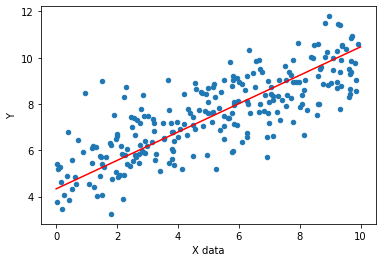

In [52]:
my_data.sample(250).plot(kind="scatter", x="X data", y="Y")
plt.plot(np.linspace(0,10,10), pred_list, "r")